# <font color = 'orange'> Optimizers
   
---
    
1. Normal Gradient Descent.
2. Gradient Descent with Momentum.
3. Adaptive Gradient Descent(AdaGrad).
4. RMS prop.
5. Adam Gradient Descent.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

D:\Anconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

x_valid, x_train = x_train_full[:5000]/float(x_train_full.max()), x_train_full[5000:]/float(x_train_full.max()) 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/float(x_train_full.max())

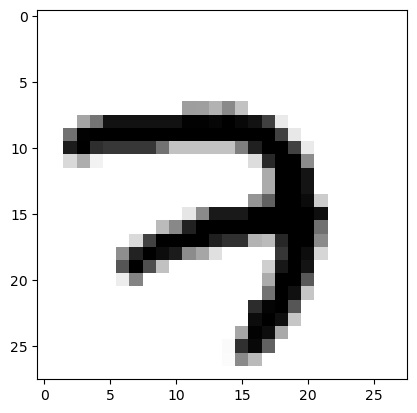

In [3]:
plt.imshow(x_train[0], cmap = 'binary')

<AxesSubplot:>

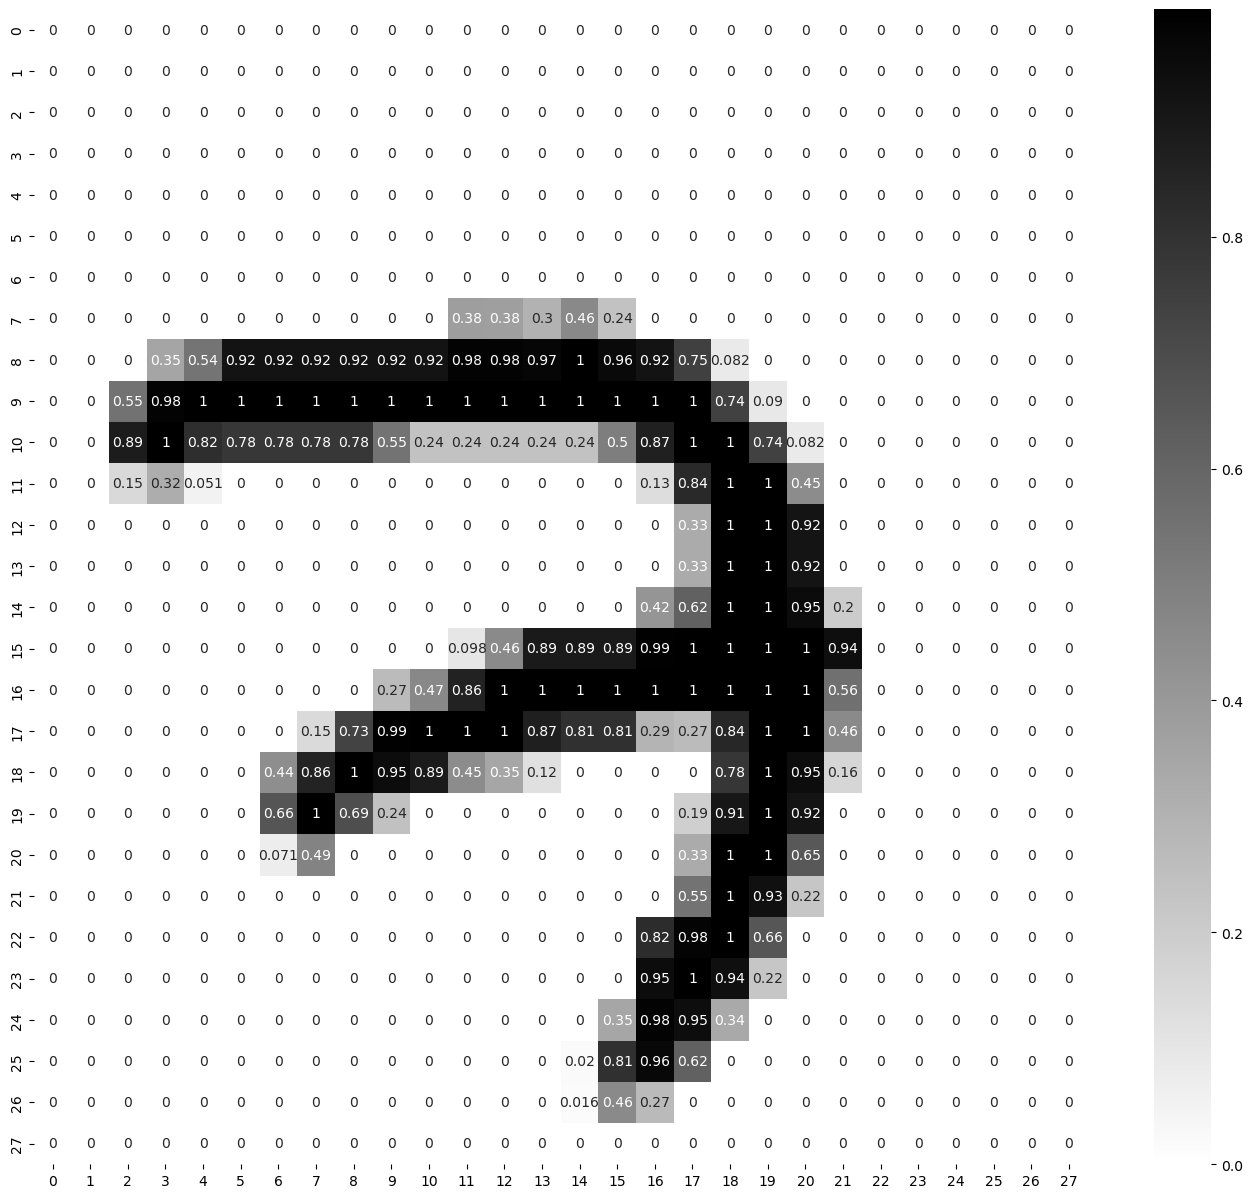

In [4]:
plt.figure(figsize = (17, 15))

sns.heatmap(x_train[0], annot = True, cmap ='binary')

---

In [5]:
layers = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name='inputLayer'),
    tf.keras.layers.Dense(300, activation='relu', name='hiddenlayer1'),
    tf.keras.layers.Dense(100, activation='relu', name='hiddenlayer2'),
    tf.keras.layers.Dense(10, activation='softmax', name='outputLayer')
]

model = tf.keras.models.Sequential(layers)

## <font color='blue'> During compilation we give the optimizer

In [6]:
adam = tf.keras.optimizers.Adam(
    learning_rate = 0.1,
    beta_1 = 0.95
)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs = 3, batch_size = 32, validation_data = (x_valid, y_valid))

Epoch 1/3
1719/1719 [==============================] - 12s 6ms/step - loss: 0.2136 - accuracy: 0.9358 - val_loss: 0.1276 - val_accuracy: 0.9632
Epoch 2/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0887 - accuracy: 0.9728 - val_loss: 0.0878 - val_accuracy: 0.9742
Epoch 3/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0585 - accuracy: 0.9814 - val_loss: 0.0802 - val_accuracy: 0.9762


In [8]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.213570,0.935782,0.127550,0.9632
1,0.088671,0.972782,0.087844,0.9742
2,0.058502,0.981364,0.080150,0.9762


<AxesSubplot:>

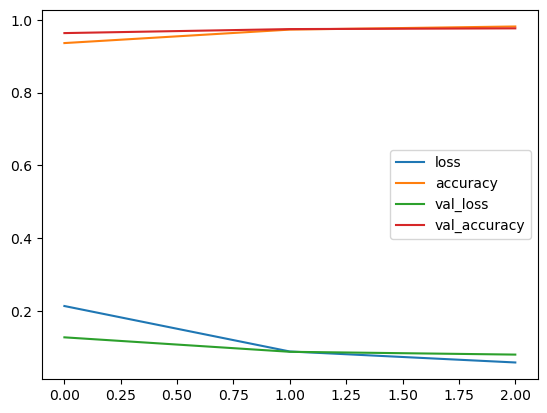

In [9]:
pd.DataFrame(history.history).plot()

---

## <font color='blue'> Prediction

In [10]:
x_new = x_test[:3]

actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [11]:
y_prob = model.predict(x_new)
y_pred = np.argmax(y_prob, axis = 1)

y_pred

1/1 [==============================] - 0s 88ms/step


array([7, 2, 1], dtype=int64)

---